In [1]:
import tensorflow as tf
import numpy as np

In [2]:
print(tf.__version__)

2.6.4


In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

11501568/11490434 [==============================] - 1s 0us/step


In [5]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28)
(28, 28)


In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape = (x_train.shape[1:]), activation = 'relu', return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.LSTM(128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

opt = tf.keras.optimizers.Adam(learning_rate = 1e-3, decay = 1e-5)

model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 3, validation_data = (x_test, y_test))

2022-12-27 19:26:32.786617: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-12-27 19:26:33.513375: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/3
1875/1875 [==============================] - 102s 53ms/step - loss: 0.7107 - accuracy: 0.7641 - val_loss: 0.1735 - val_accuracy: 0.9480
Epoch 2/3
1875/1875 [==============================] - 102s 54ms/step - loss: 0.1847 - accuracy: 0.9508 - val_loss: 0.1358 - val_accuracy: 0.9612
Epoch 3/3
1875/1875 [==============================] - 101s 54ms/step - loss: 0.1204 - accuracy: 0.9680 - val_loss: 0.1029 - val_accuracy: 0.9765


In [7]:
prediction = model.predict(x_test)

In [8]:
print(np.argmax(prediction[0]))

7


In [9]:
import matplotlib.pyplot as plt

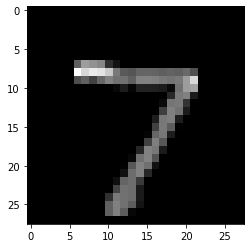

In [10]:
plt.imshow(x_test[0], cmap="gray")
plt.show()